0 Clustering: The K-means Clustering
-------------------
In this section, .

In [2]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create artificial dataset containing 350 2-dimensional data points
points = np.vstack(((np.random.randn(150, 2) * 0.7 + np.array([2, 0])),
                  (np.random.randn(100, 2) * 0.3 + np.array([-0.5, 1.0])),
                  (np.random.randn(100, 2) * 0.5 + np.array([0.0, -1.0]))))

plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([2, 0]), 0.7/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 1.0]), 0.3/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([0.0, -1.0]), 0.5/2, fill=False, lw=2))
plt.title('Data')
plt.legend()

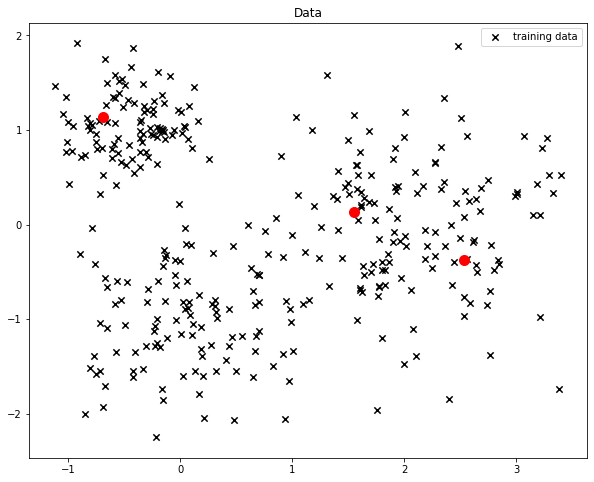

In [2]:
# During K-means clustering, you need to initialize some random centroids by using existing data points.

# First, you need to identify the number of centroids: k.
k = 3

# Then, choose k data points randomly as the initial centroids.
centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]  # And choose the first k data points in the shuffled dataset as initialized centroids.

# You can also plot and visualize the initialization
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# Try to run this section of code for few more times to see the randomization.

In [3]:
# Clustering: assign each data points to its closest centroid

# First, you need to compute the distance between each point and each centroid.
# Thus, for each of the data points you will have three distances to the three initialized centroids.
distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))

# Now, for each of the data points, find the index of the closest centroid, pleast print it out and see how they look like.
closest_ind = np.argmin(distances, axis=0)

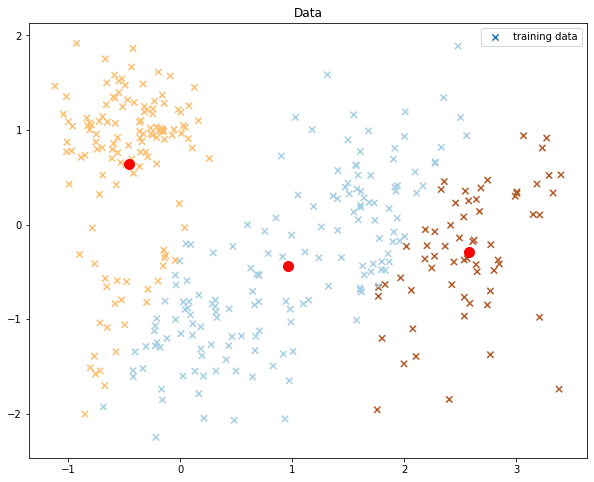

In [4]:
# Once you have assigned the data points into their closest centroids, you have your first clusters.
# What you need to do is updating the random centroids to the center/mean of the new clusters.

centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])

# You can visualize the updated centroids. Do you see the difference?
plt.figure(figsize=(10,8))
# You can also try to color the data points by their centroid/cluster index
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# You can simply run and re-run this few lines of codes including distance computation and centroids update to see how centroids can be continuously updated.

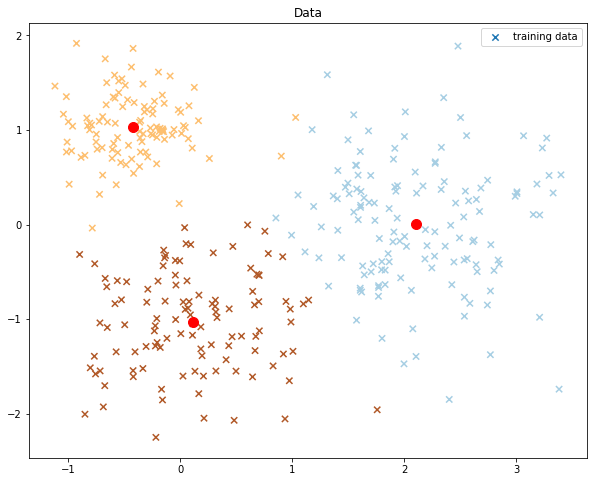

In [5]:
# We can also wrap these few lines of code in a 'for loop' to see if how centroids converge in few iterations.

centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]

iterations = 5
for i in range(iterations):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    closest_ind = np.argmin(distances, axis=0)
    centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])
    
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

In [6]:
# Let's try to wrap-up all the codes into functions

In [7]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

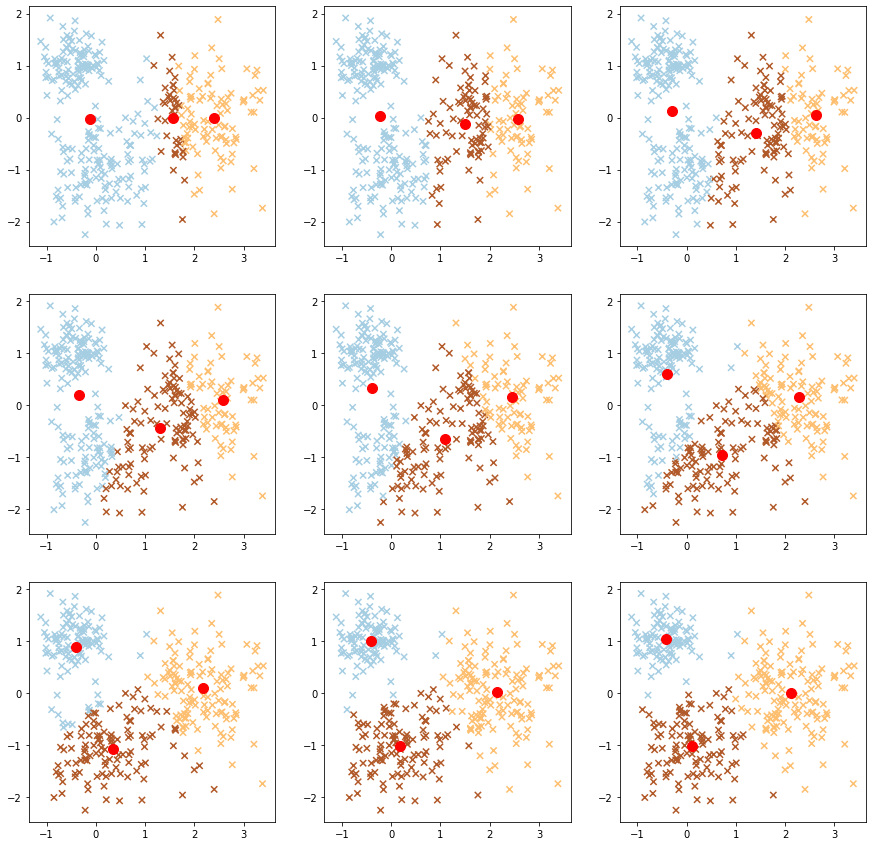

In [8]:
# Try to call your function, and inspect how centroids are updated.
centroids = initialize_centroids(points, 3)

fig = plt.figure(figsize=(15,15))
for i in range(9):
    closest_ind = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest_ind, centroids)
    plt.subplot(3, 3, i+1)
    plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    

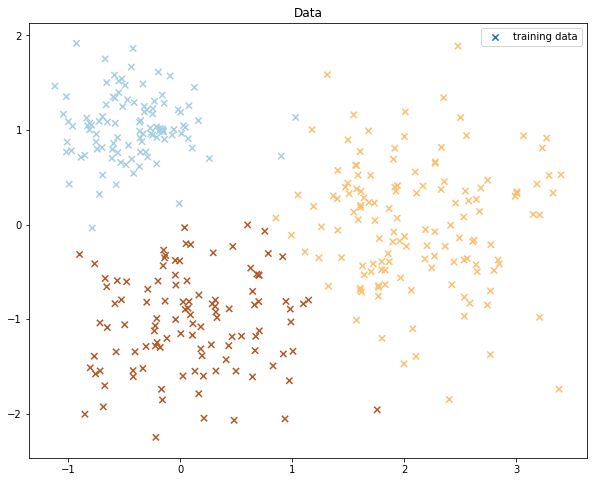

In [9]:
# In fact, today, you don't have to implement the K-means by yourself.
# The 'sklearn' module has already implemented the K-means for you, and you can directly use the clustering functionality by calling the functions within the module.

# Let's try the 'sklearn' on our artifical dataset.
# This code will use few modules: pathlib, Numpy, matplotlib, Scipy and sklearn
from sklearn import cluster

kmean_cluster = cluster.KMeans(n_clusters=3)  # This is a function to be fitted to the data
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly contained in the results. For instance, what is the 'kmean_cluster'?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='x', label='training data')
plt.title('Data')
plt.legend()

# Compare the results with those you obtained above.

In [1]:
# Now, it's time to try the K-means on real dataset!

# You will focus on land use and land cover (LULC) classification in Netherlands.
# The first thing you'd like to do is to get familiar with the dataset in the study area.
# The dataset has already been used in the previous sessions of the Applied Data Science.

# This code will use few modules to load and visualize our data: rasterio, geopandas, Numpy and matplotlib.
# And sklearn and numpy for data processing.

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.plot import show
from sklearn import cluster

# The data contains sample LULC areas around dutch provinces North Holland and Utrecht.
aoi = gpd.read_file('data/aoi_NL_5_classes.shp')
print (aoi.head())

# Below is a visualization of the sample LULC areas superimposed on a satellite image of part of the Netherlands
file_location = 'data/b5_2015.TIF'
b5_2020 = rasterio.open(file_location, nodata=0)

fig,ax = plt.subplots(1,1, figsize=(10,10))
show(b5_2020, ax=ax, cmap='gray', alpha=0.25)
aoi.plot(column='land_cover', legend=True, ax=ax, cmap='Set1')


     id   land_cover  class                                           geometry
0  None  Clear water     11  POLYGON ((638038.588 5776433.484, 637916.087 5...
1  None  Clear water     11  POLYGON ((638293.014 5776226.174, 638669.940 5...
2  None  Clear water     11  POLYGON ((642646.516 5779109.663, 643438.062 5...
3  None  Clear water     11  POLYGON ((658307.816 5795505.970, 659438.596 5...
4  None  Clear water     11  POLYGON ((617048.489 5789668.319, 617764.649 5...


In [2]:
# We have already prepared all the data in the form of a table.
# You can load the data by using Geopandas

import pandas as pd
lulc = pd.read_csv('data/stack_aoi_2015.csv')

# View some sample rows of the data
lulc.head()

,Unnamed: 0,B1,B2,B3,B4,B5,B6,B7,aoi
0,1902216,8906,9144,9577,9849,12021,12200,11311,31.0
1,1905436,8781,8938,9394,9550,11382,11727,10709,31.0
2,1905437,9071,9151,9620,10164,12103,13131,12497,31.0
3,1905438,9177,9319,9903,10534,13304,14292,13025,31.0
4,1908657,9048,9202,9670,9633,11398,11684,11125,31.0


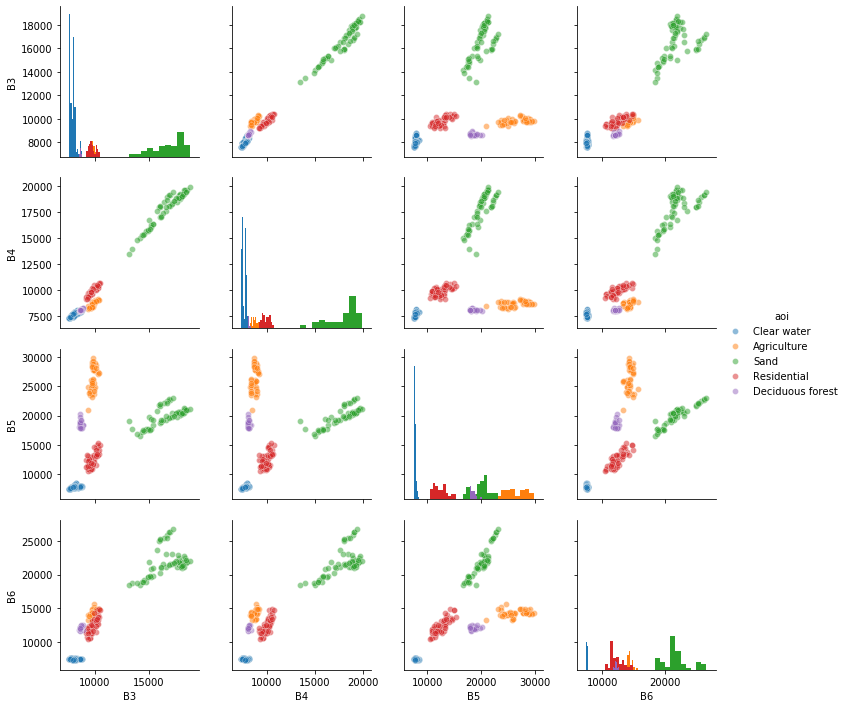

In [3]:

import seaborn as sns

# Subset for plotting speed
lulc_sub = lulc.sample(n=500)

# adjust aoi numbers to land cover
aoi['aoi_cat'] = pd.Categorical(aoi['class'])
classes = aoi.loc[:,['land_cover', 'aoi_cat']].drop_duplicates()
class_dict = {k:v for k,v in zip(classes.aoi_cat, classes.land_cover)}
lulc_sub.replace({'aoi': class_dict}, inplace=True)
sns.pairplot(lulc_sub.loc[:,['B3', 'B4', 'B5', 'B6', 'aoi']], hue='aoi', diag_kind="hist", 
             plot_kws=dict(linewidth=0.5, alpha=0.5))


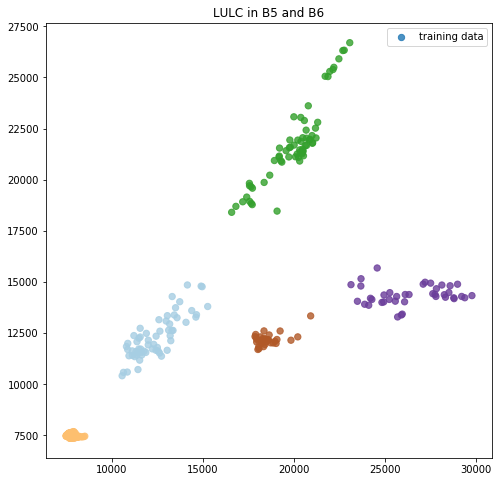

In [4]:
# How are the data points separated in the feature space defined by bands?

#

from sklearn import cluster

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B5'].values, lulc_sub['B6'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly contained in the results. For instance, what is the 'kmean_cluster'?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(8,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B5 and B6')
plt.legend()

# Compare the results with those you obtained above.

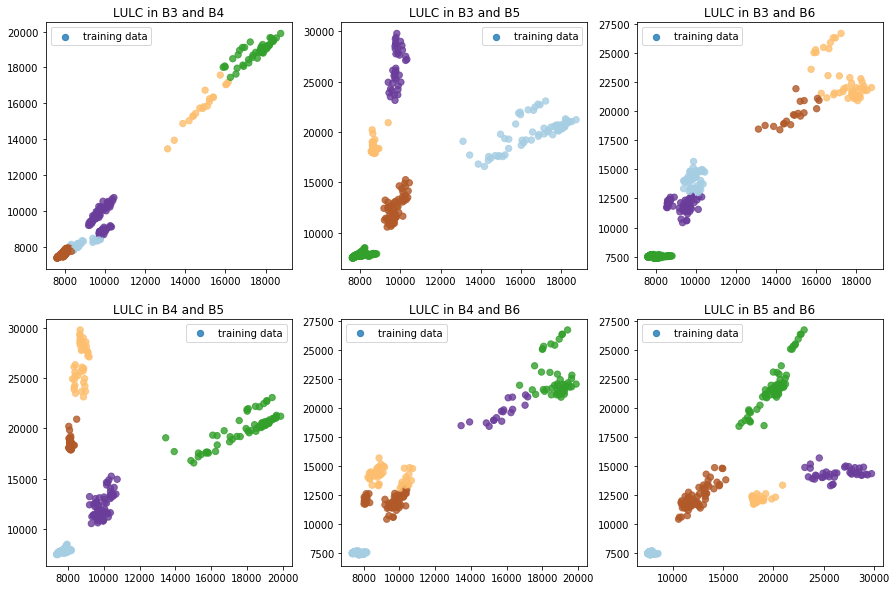

In [5]:

# How about all the other combinations?

fig = plt.figure(figsize=(15,10))

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B3'].values, lulc_sub['B4'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data
plt.subplot(2, 3, 1)
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B3 and B4')
plt.legend()

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B3'].values, lulc_sub['B5'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data
plt.subplot(2, 3, 2)
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B3 and B5')
plt.legend()

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B3'].values, lulc_sub['B6'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data
plt.subplot(2, 3, 3)
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B3 and B6')
plt.legend()

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B4'].values, lulc_sub['B5'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data
plt.subplot(2, 3, 4)
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B4 and B5')
plt.legend()

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B4'].values, lulc_sub['B6'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data
plt.subplot(2, 3, 5)
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B4 and B6')
plt.legend()

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc_sub['B5'].values, lulc_sub['B6'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data
plt.subplot(2, 3, 6)
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B5 and B6')
plt.legend()


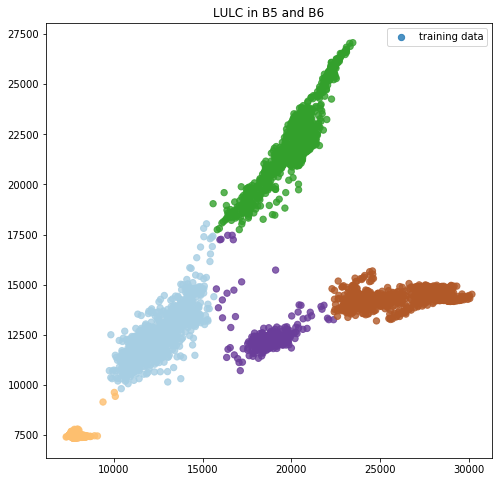

In [6]:

# If some of the bands combination seems good to apply the K-means for unsupervised classification, 
# why not deploy the classification for all the pixels?

kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
points = np.c_[lulc['B5'].values, lulc['B6'].values]
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly contained in the results. For instance, what is the 'kmean_cluster'?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(8,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='o', alpha=0.8, label='training data')
plt.title('LULC in B5 and B6')
plt.legend()

In [7]:
# Since we do have the true classes, we can evaluate our K-means outcomes by using a confusion matrix.
# Could you try to figure out how the confusion matrix works?

import pandas as pd

y_actu = pd.Series(list(lulc['aoi'].values), name='Actual')
y_pred = pd.Series(list(labels), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

Predicted     0     1     2    3    4
Actual                               
11.0          0     0  5071    0    0
21.0         15  1092     0    4    0
31.0       1075     0     3   11    0
52.0          0     0     0    8  710
61.0          2     0     0  617    0


In [8]:
# How do you interpret the result?
# How does it compare to the original labels?
# What else could you obtain if the number of clusters (the value k) changes?
# Try to apply the confusion matrix evaluation to other clustering outcomes in different feature space defined by bands combination.

['data/b5_2015.TIF', 'data/b6_2015.TIF']
(3434, 3221)

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.



(11060914, 1)
(3434, 3221)
(11060914, 2)
This can take quite a while with large images...


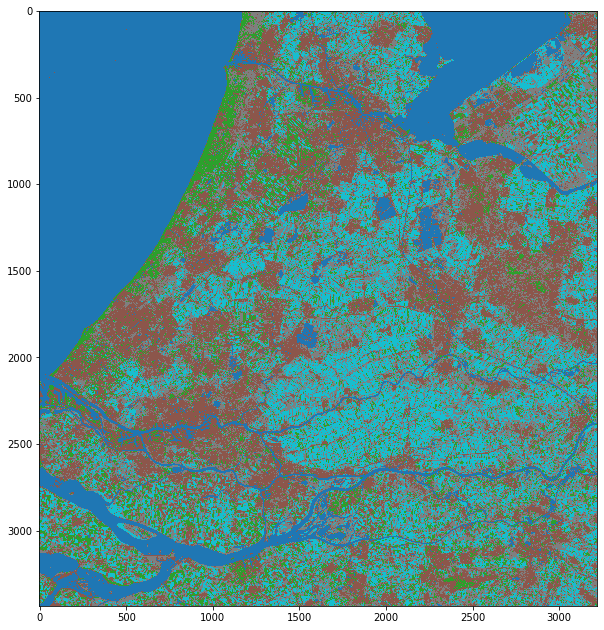

In [9]:
# How about generalize the K-means from few data points/pixels to some entire images?

# You may want to see how the K-means performs in a proper feature space.

# This code will use few modules: pathlib, Numpy, matplotlib, Scipy and sklearn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from sklearn import cluster

file_list = ['data/b5_2015.TIF', 'data/b6_2015.TIF']  # List to store file names

# You can print to see how the file_list looks like
print(file_list)

# Read the files and stack them together by calling their names
# Use the 'for' loop to iterate over the names to read files
stack = np.array([])  # Empty array to store the stacked images
for file in file_list:
    img = ndimage.imread(file)  # Read each image file
    print(img.shape)  # Each time, also check the size of the image
    
    # In order to do clustering, image should be reshaped into a single column
    img_col = img.reshape(-1, 1)
    
    # Each time put the reshaped image into the stack
    stack = np.hstack((stack,img_col)) if stack.size else img_col
    # Also to check the size of the stack
    print(stack.shape)
    
# Now, it's time for the Kmeans
# An arbitrary number of clusters, please do make some changes
print('This can take quite a while with large images...')
kmean_cluster = cluster.KMeans(n_clusters=5)  # This is a function to be fitted to the data
labels = kmean_cluster.fit_predict(stack)  # Fitting the data

# Visualization
# Because the predicted labels are still in one column, you need to reshape it back to original image shape
row, col = img.shape  # Get the original dimensions of the image
plt.figure(figsize = (10,12))
plt.imshow(labels.reshape(row, col), cmap='tab10')

In [ ]:
# Does the number of clusters make sense to you?
# How do you interpret the result?
# How does it compare to the original labels?